# Solving ODEs with SciPy

Having been introduced to the basic concepts in numerical solutions of ODEs, we now turn to the SciPy library. The ODE solver [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
will allow you to solve a variety of ODEs and will take care of most of the grungy details for you. 
It will use more sophisticated methods than Euler's method, but conceptually all it does is time step from the initial condition to the final time. 

The best way to learn to use it is to look at worked examples. Here we consider the damped harmonic oscillator.

---
### Importing odeint

To use `odeint` you first need to import it. This is similar to `numpy` and `matplotlib` except that we do not want to import all of SciPy, only the one thing we need. The syntax for importing this one thing is

```
from scipy.integrate import odeint
```

We add this line to where we import libraries

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Defining our RHS function

The next thing we will always do is define a Python function that corresponds to the system of ODEs that we want to study. In this example we will study the damped harmonic oscillator given by the system of ODEs:

$$
\begin{align}
\dot y_1 & = y_2  \\
\dot y_2 & = - y_1 - \mu y_2,
\end{align}
$$

where $\mu \ge 0$ is a parameter.

In the exercise at the end of ODE notebook 2 we wrote a Python function for this system. Here it is again. You should understand it and how it encodes in Python the equations for the ODEs.

In [2]:
def damped(y, t):
    # returns RHS of damped harmonic oscillator ODE

    y1, y2 = y
    
    mu = 0.25 
    
    y1dot = y2
    y2dot = -y1 - mu * y2

    return y1dot, y2dot

### Problem setup

Next we set up the problem. This means setting the initial conditions `y0` and the time array `t`. Frequently one does not know in advance what are good values for these. It is common to play a bit and adjust things based on running the code. In particular, the first guesses for `tf` are often too small or too big. Just come back and change these. `Nsteps` will need adjusting so that the solutions look smooth when plotted. (Please don't exceed `Nsteps = 100000` in your submissions!)

(Note, odeint will use whatever time steps it needs to solve the ODE accurately. `Nsteps` only affects the times at which the solution is returned.)

In [3]:
# set initial conditions 
y0 = np.array([5, -1])

# set up time grid for solution
Nsteps = 1000
tf = 6 * np.pi
t= np.linspace(0, tf, Nsteps+1)

### Call the ODE solver

We call `odeint` with three arguments: name of the RHS function, the initial condition array, and the time array. `odeint` returns the solution `y_sol`. 

As described in the second ODE notebook, we typically then extract individual components of the solution for later plotting. (As always, you cannot forget that Python uses 0-based indexing.)

In [4]:
# call solver        
y_sol = odeint(damped, y0, t)

y1 = y_sol[:,0]
y2 = y_sol[:,1]

### Plotting the solution

This is the fun part. After we get our solution we can plot it. The usual things to plot are dependent variables as a function of time (often call a time series) and phase portraits, where we plots dependent variables against one another. Ideally we would plot arrows on the phase portraits to show the direction of time. Here, to distinguish the time direction in phase portraits we plot different symbols at the beginning and end.  

As with adjusting the initial condition and final time, you may need to play with the plotting to get nice plots. In particular, setting limits for the phase portrait will require seeing the solution first. In this case I plot the phase portrait in a square box (using `figsize=`) with `xlim` and `ylim` the same, but this is not always necessary. 

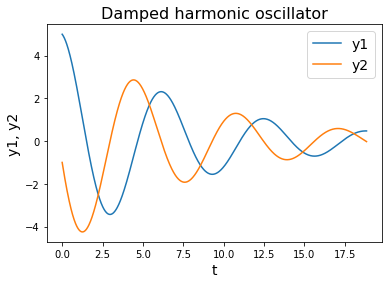

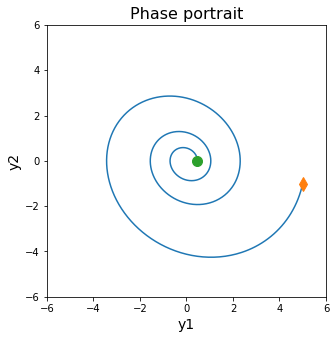

In [6]:
# plot the numerical solution
plt.plot(t,y1,'-', label="y1")
plt.plot(t,y2,'-', label="y2")

# labels etc
plt.xlabel("t", fontsize=14)
plt.ylabel("y1, y2", fontsize=14)
plt.legend(fontsize=14)
plt.title("Damped harmonic oscillator", fontsize=16)
plt.show()        
        
# plot a phase portrait with markers at beginning and end.
fig = plt.figure(figsize=(5,5))
plt.plot(y1, y2)
plt.plot(y1[0], y2[0],'d', markersize = 10)
plt.plot(y1[-1], y2[-1],'o', markersize = 10)

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel("y1", fontsize=14)
plt.ylabel("y2", fontsize=14)
plt.title("Phase portrait", fontsize=16)
plt.show()         

### Summary

All the examples that we will consider follow this same pattern: 
- We define a Python function corresponding to the ODEs.
- We set up the problems: initial conditions, time grid etc.
- We call the solver to get our solutions and separate out the different dependent variables.
- We plot or otherwise analyse the results.

In this notebook the various code cells have been separated for discussion purposes. For working on codes this is recommended. For submitting assignments, you may find it better to merge most of the code cells into one (see example notebooks that follow).

#### Note

The currently recommended ODE solver in SciPy is not [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), but [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). *odeint* is better for our purposes, but if you do something with Python and ODEs in the future, you should consider using *solve_ivp*.

---
# Exercise

1. You really should not leave this notebook without playing with the parameters above. At least change `mu` to larger and smaller values. You may then want to adjust `tf` and possibly `Nsteps`.
For `mu=0` the system reduces to the un-damped harmonic oscillator, so try `mu = 0`.

---